In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

In [14]:
csv_path = 'diabetes_binary_health_indicators_BRFSS2015.csv'

diab_df= pd.read_csv(csv_path)
diab_df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [15]:
# Create the labels set `y` and features DataFrame `X`
X = diab_df.copy()
X = X.drop(columns='Diabetes_binary')
y = diab_df['Diabetes_binary']

In [16]:
y.value_counts()

Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64

In [17]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.head()


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
199518,1.0,0.0,1.0,35.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,30.0,0.0,1.0,0.0,11.0,6.0,5.0
18432,0.0,1.0,1.0,23.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,3.0,7.0,3.0,0.0,0.0,7.0,4.0,5.0
91871,0.0,0.0,1.0,31.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,1.0,0.0,0.0,0.0,5.0,6.0,8.0
73838,0.0,0.0,1.0,27.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,6.0,5.0
1762,1.0,1.0,1.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,4.0,7.0


In [18]:
# Train a Logistic Regression model and print the model score
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression()

logistic_regression_model.fit(X_train, y_train)


/opt/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
# Make and save testing predictions with the saved logistic regression model using the test data
testing_predictions = logistic_regression_model.predict(X_test)

# Review the predictions
testing_predictions 

array([1., 0., 0., ..., 0., 0., 0.])

In [20]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
accuracy_score(y_test, testing_predictions)


0.8641911069063387

In [21]:
# Make and save testing predictions with the saved logistic regression model using the test data
training_predictions = logistic_regression_model.predict(X_train)

# Review the predictions
training_predictions 

array([0., 0., 0., ..., 0., 0., 0.])

In [22]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
accuracy_score(y_train, training_predictions)


0.8620939766635131

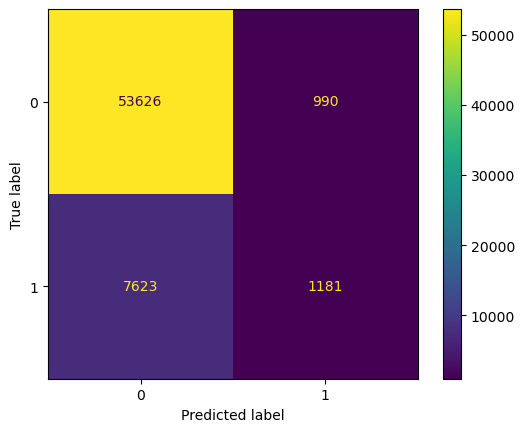

In [23]:
confusion_matrix = metrics.confusion_matrix(y_test, testing_predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()